## Billar

Sabemos que la ecuación de movimiento para una partícula en el espacio sin restricciones es:

\begin{equation}
m \dfrac{d² x(t)} {dt²} = F,
\end{equation}

donde $x \in \mathbb{R}² y F = 0$. Por lo tanto

$$ \ddot{q}= 0\\ (\dot{x}, \dot {y}) = (0,0) $$

Por lo que el campo vectorial a integrar es:

\begin{equation}
\dot{x} = V_X \\
\dot{y} = V_y \\
\dot{V}_x = 0\\
\dot{V}_y = 0 \\
\end{equation}

Ahora definamos el campo vectorial

In [6]:
from numpy import *
from scipy.integrate import *
from pylab import *
%matplotlib inline 

In [8]:
def Movimiento(x,t):
    return [x[2],x[3],0,0]

In [42]:
#t = linspace (0,5,1001)

In [43]:
xout = odeint(Movimiento,[1,1,0.2,-.5],t)

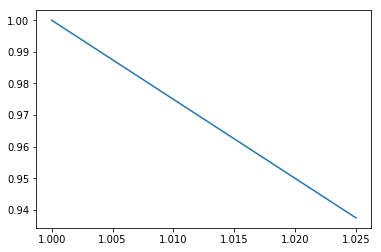

In [44]:
plot(xout[:,0], xout[:,1])

In [45]:
xout

array([[ 1.     ,  1.     ,  0.2    , -0.5    ],
       [ 1.0025 ,  0.99375,  0.2    , -0.5    ],
       [ 1.005  ,  0.9875 ,  0.2    , -0.5    ],
       [ 1.0075 ,  0.98125,  0.2    , -0.5    ],
       [ 1.01   ,  0.975  ,  0.2    , -0.5    ],
       [ 1.0125 ,  0.96875,  0.2    , -0.5    ],
       [ 1.015  ,  0.9625 ,  0.2    , -0.5    ],
       [ 1.0175 ,  0.95625,  0.2    , -0.5    ],
       [ 1.02   ,  0.95   ,  0.2    , -0.5    ],
       [ 1.0225 ,  0.94375,  0.2    , -0.5    ],
       [ 1.025  ,  0.9375 ,  0.2    , -0.5    ]])

In [56]:
xout[-1]

array([ 0.475 , -0.0375,  0.2   , -0.5   ])

In [9]:
def Newton (F,x_k, t_k,i, TOL= 1e-5, NMAX=200):
    for n in range (1,NMAX+1):
        t0= t_k
        t_k = t_k -(x_k[i]/F(x_k,t_k)[i])
        t= linspace(t0,t_k,11)
        x_k= odeint(F, x_k, t)
        if abs(x_k[-1][i])<TOL:
            break
    if n == NMAX:
        print("Reached max number of steps")
    else: 
        return x_k

In [10]:
def caja(x, tiempo):
    if x[1] <= 0:
        xnew = Newton(Movimiento,x,tiempo,1)
        x[0] = xnew[-1][0]
        x[1] = xnew[-1][1]
        print("Abajo ", x[0], x[1])
        x[3]= -x[3]
        #return (x[0],-x[1])
        #print ("Pared abajo")
    elif x[1]>= 1:
        x[1]= x[1]-1.0
        xnew = Newton(Movimiento,x,tiempo,1)
        x[0] = xnew[-1][0]
        x[1] = xnew[-1][1] + 1.0
        print("Arriba ", x[0], x[1])
        x[3]= -x[3]
        #return (x[0],2-x[1])
        #print ("Pared arriba")
    elif x[0]<= 0:
        xnew= Newton(Movimiento, x, tiempo, 0)
        x[0]= xnew[-1][0]
        x[1] = xnew[-1][1]
        print ("Izquierda ", x[0], x[1])
        x[2] = -x[2]
        
        #return (-x[0],x[1])
        #print ("Pared izquierda")
    elif x[0]>= 1:
        x[0]= x[1]-1.0
        xnew = Newton(Movimiento,x,tiempo,1)
        x[0] = xnew[-1][0]+1.0
        x[1] = xnew[-1][1] 
        print("Derecha ", x[0], x[1])
        x[2]= -x[2]
        #return (2-x[0],x[1])
        #print ("Pared derecha")
    return x

In [11]:
t= linspace (0,1/2**3,11)

In [ ]:
i= 0
inicond= [0.1,0.9,0.2,-0.5]
x, y = zeros(80), zeros(80)
tiempo = 0
while i < 80:
    xout = odeint(Movimiento,inicond,t)
    inicond= caja(xout[-1],tiempo)
    tiempo = tiempo + i/2**3
    x[i] = inicond[0]
    y[i]= inicond[1]
    i += 1
    

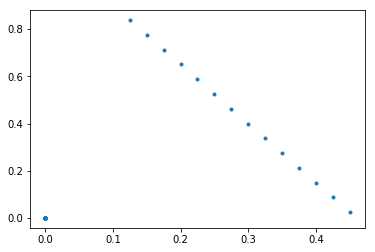

In [33]:
plot(x,y, ".")

In [2]:
def Mov2d(x,y):
    r = ((x[0]-x[1])**2+(y[0]-y[1])**2)**(3/2)
    return [x[2],x[3],-(x[0]-y[0])]